In [5]:
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [6]:
df= pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#check missing values
df.isnull().sum() #no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#check duplicates
df.duplicated() #no duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [11]:
#type conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df = df.dropna(subset=['TotalCharges'])

#creating raw data copy
df_raw=df.copy()

In [12]:
#label encoding for binary columns (yes/no)
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0})

# label encoding for gender i.e 1 for male and 0 for female
df['gender']=df['gender'].map({'Male':1,'Female':0})


In [13]:
#One Hot Encoding for categorical columns
category_cols=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
               'PaymentMethod']
df= pd.get_dummies(df,columns=category_cols,drop_first=True)

#verifying no object remains
df.select_dtypes(include='object')

,customerID
0,7590-VHVEG
1,5575-GNVDE
2,3668-QPYBK
3,7795-CFOCW
4,9237-HQITU
...,...
7038,6840-RESVB
7039,2234-XADUH
7040,4801-JZAZL
7041,8361-LTMKD


In [14]:
#scaling numeric columns 
cols_to_scale =['MonthlyCharges','TotalCharges','tenure']
for col in cols_to_scale:
    df[col+'_scaled']=(df[col]-df[col].mean())/(df[col].std())


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_scaled,TotalCharges_scaled,tenure_scaled
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,True,False,-1.161611,-0.994123,-1.280157
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,True,False,False,False,True,-0.260859,-0.173727,0.064298
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,True,-0.363897,-0.959581,-1.239416
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,True,False,False,False,False,-0.747797,-0.195234,0.512450
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,True,False,0.196164,-0.940391,-1.239416


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

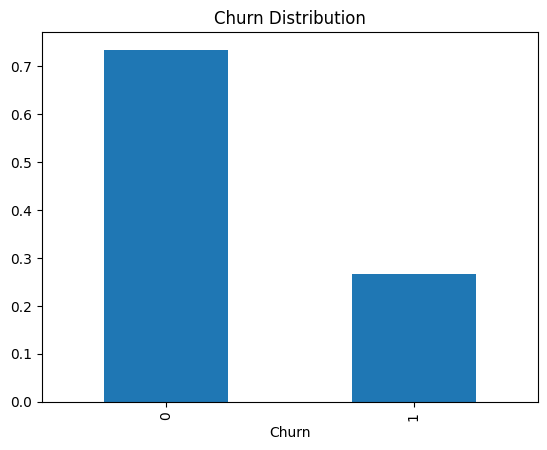

In [16]:
#detecting class imbalance ( when one class in this case No dominates)
print(df['Churn'].value_counts(normalize=True))
df['Churn'].value_counts(normalize=True).plot(kind='bar',title='Churn Distribution')

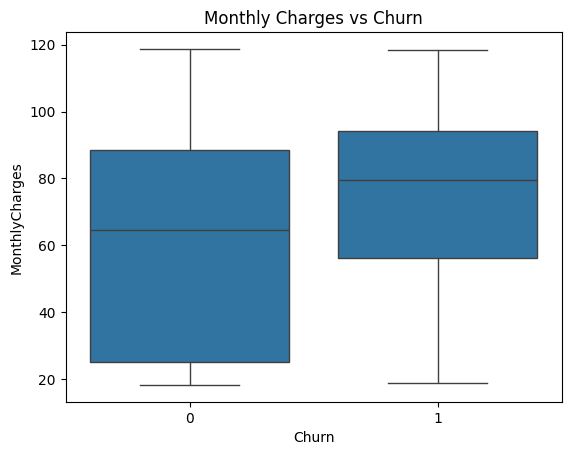

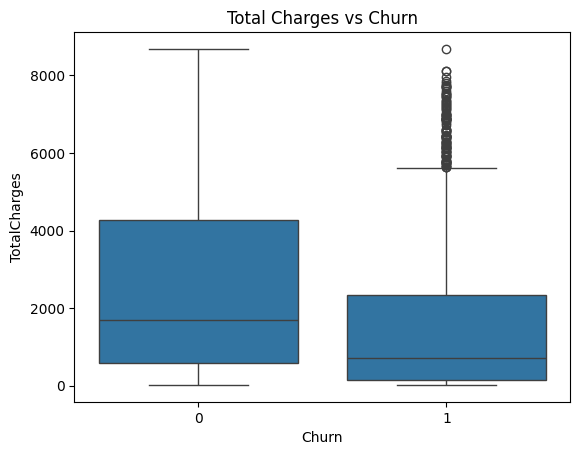

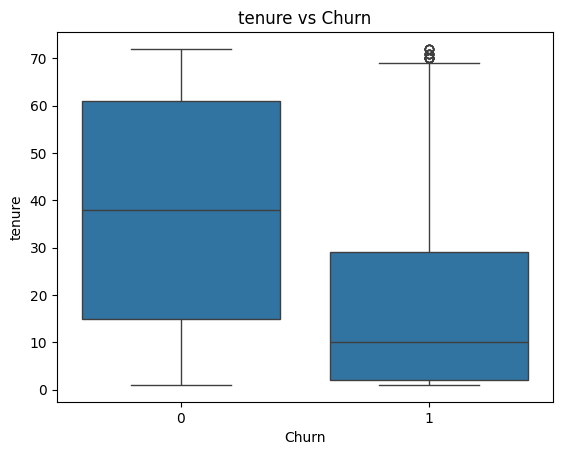

In [17]:
# Numeric features vs Churn
# using boxplot 
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title('Monthly Charges vs Churn')
plt.show ()

sns.boxplot(x='Churn',y='TotalCharges',data=df)
plt.title('Total Charges vs Churn')
plt.show ()

sns.boxplot(x='Churn',y='tenure',data=df)
plt.title('tenure vs Churn')
plt.show ()

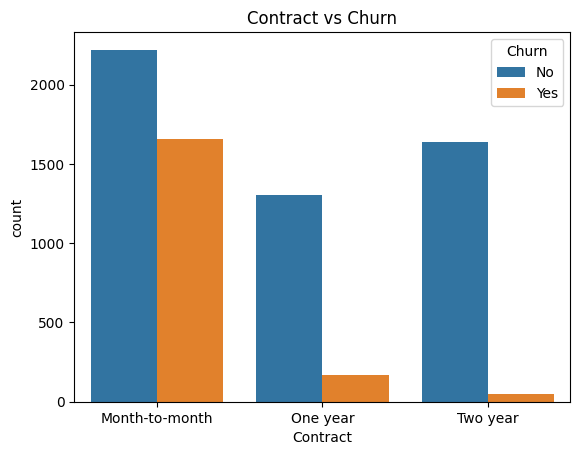

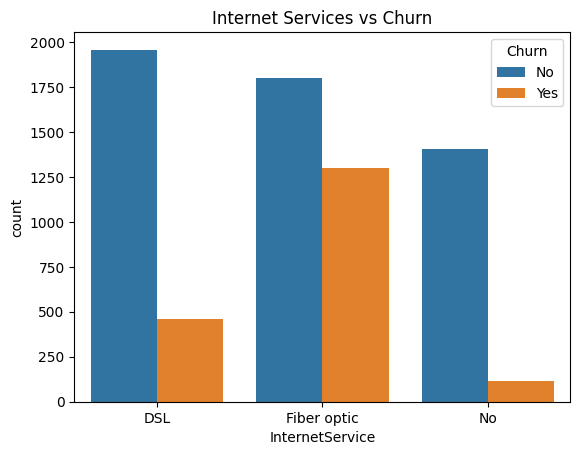

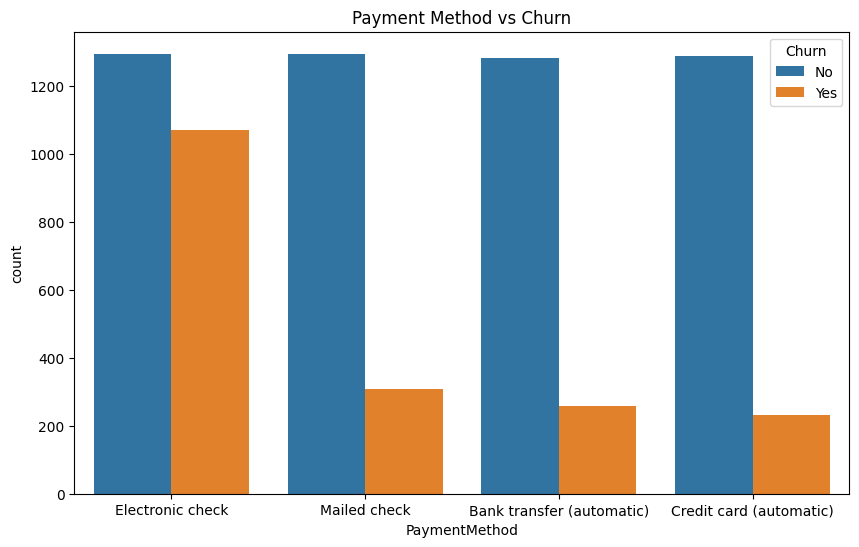

In [18]:
#categorical features vs churn
#using bar plots
sns.countplot(x='Contract',hue='Churn',data=df_raw)
plt.title('Contract vs Churn')
plt.show ()

sns.countplot(x='InternetService',hue='Churn',data=df_raw)
plt.title('Internet Services vs Churn')
plt.show ()

plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=df_raw)
plt.title('Payment Method vs Churn')
plt.show ()


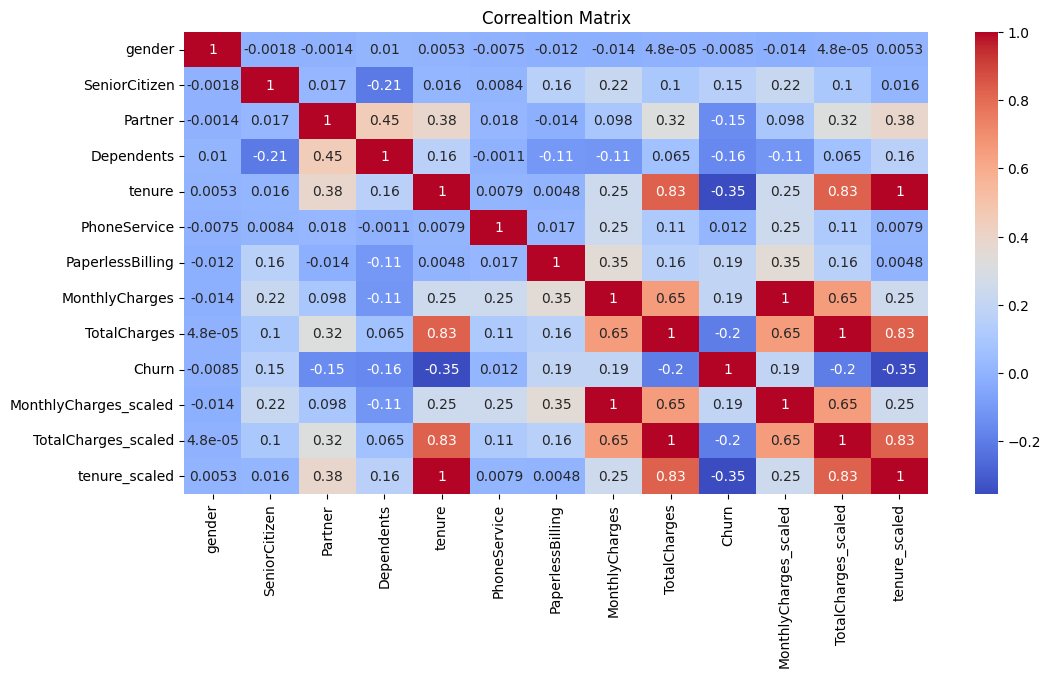

In [19]:
#correlation matric for numeric features
numeric_cols=df.select_dtypes(include=np.number).columns
corr=df[numeric_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correaltion Matrix')
plt.show()

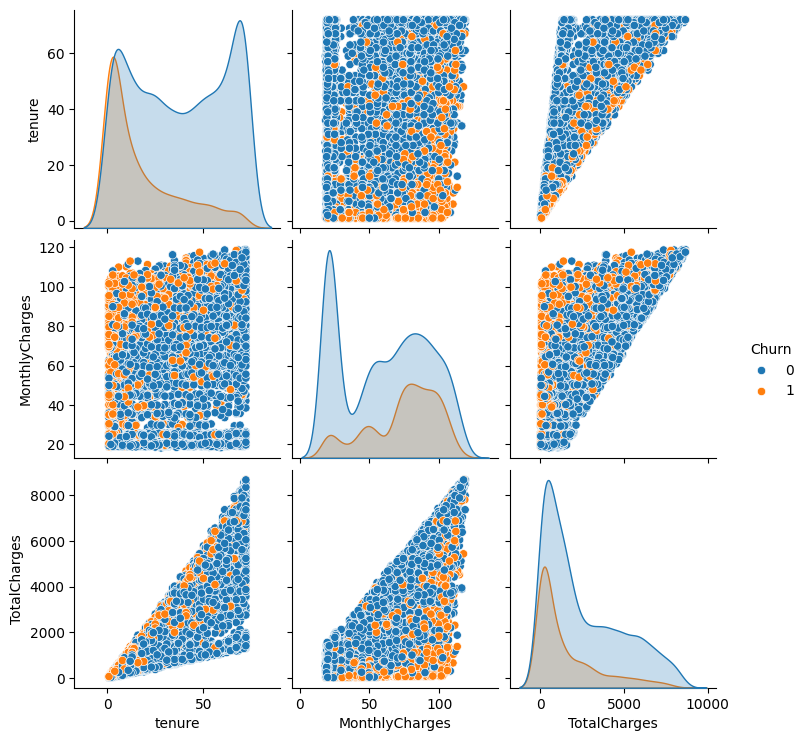

In [20]:
#pair plots
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']],hue='Churn')

In [21]:
# dropping customer id
df= df.drop('customerID', axis=1)

In [22]:
#Model building - baseline models 
#split data into train and test 
from sklearn.model_selection import train_test_split
# x = all features, y= target
x = df.drop('Churn', axis=1)
y = df['Churn']

#split the data (80% train; 20% test)
X_train, X_test, y_train, y_test = train_test_split (
    x, y, test_size =0.2, stratify=y, random_state=42)


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(class_weight='balanced', max_iter=5000)
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [24]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier( class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
#support vector machine
from sklearn.svm import SVC
model_svc = SVC( class_weight='balanced', probability=True, random_state=42)
model_svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False



===Logistic Regression===
Accuracy:  0.7263681592039801
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



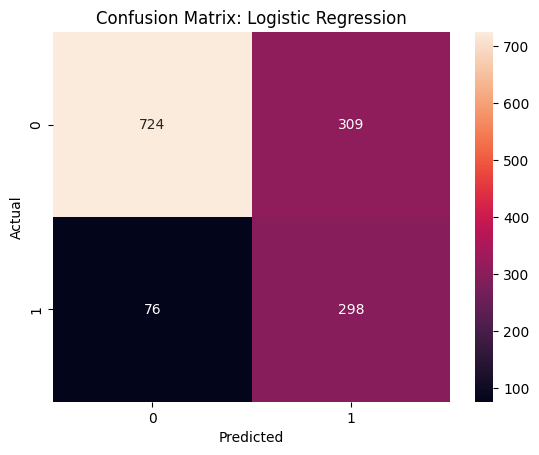


===Random Forest===
Accuracy:  0.7853589196872779
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



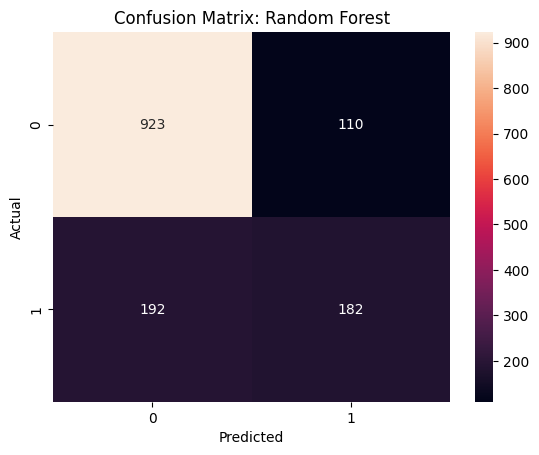


===SVC===
Accuracy:  0.6588486140724946
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75      1033
           1       0.40      0.58      0.47       374

    accuracy                           0.66      1407
   macro avg       0.61      0.63      0.61      1407
weighted avg       0.71      0.66      0.67      1407



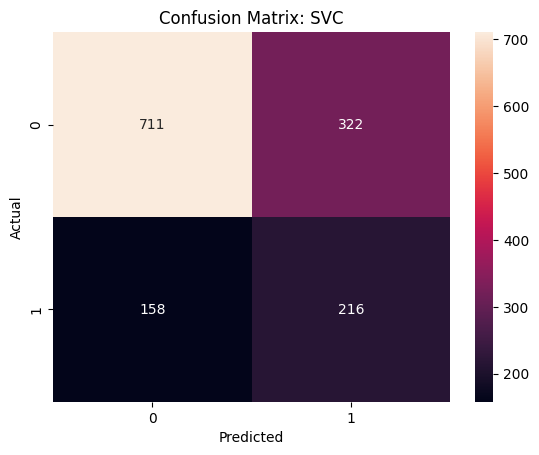

In [26]:
#evaluate the models 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
models = {
    'Logistic Regression': model_lr,
    'Random Forest': model_rf,
    'SVC': model_svc
}

for name, model in models.items():
    print(f'\n==={name}===')
    y_pred = model.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Classification Report:\n", classification_report(y_test,y_pred))
    #visualizing confusion matrix 
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [27]:
#Logistic Regression - Hyperparamter Tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}
grid_lr= GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression", grid_lr.best_params_)
print("Best F1 score", grid_lr.best_score_)

Best Logistic Regression {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best F1 score 0.6350094725922448


In [28]:
#Random Forest Tuning
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5,10, None],
    'min_samples_split':[2, 5],
    'class_weight': ['balanced']
}
grid_rf= GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

print("Best Random Forest", grid_rf.best_params_)
print("Best F1 score", grid_rf.best_score_)

Best Random Forest {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 score 0.6335168659324687


In [29]:
#comparing the best models 
models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
}

for name, model in models.items():
    print(f'\n==={name}===')
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test,y_pred))


===Logistic Regression===
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


===Random Forest===
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.82      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.75      1407



In [30]:
#final model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

final_model = grid_rf.best_estimator_
y_pred = final_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("ROC AUC score:\n", roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.82      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.75      1407

Confusion Matrix:
 [[734 299]
 [ 69 305]]
ROC AUC score:
 0.8378897453551517


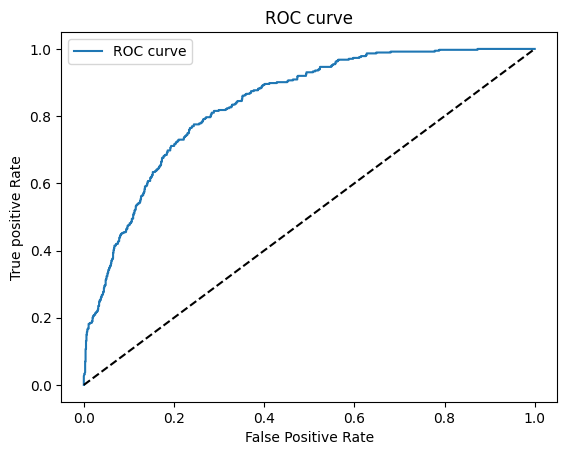

In [32]:
#plot ROC curve 
from sklearn.metrics import roc_curve

y_probs = final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, y_probs)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Top 5 important features:
 tenure                         0.140489
tenure_scaled                  0.130977
Contract_Two year              0.126988
InternetService_Fiber optic    0.083013
TotalCharges                   0.058306
dtype: float64


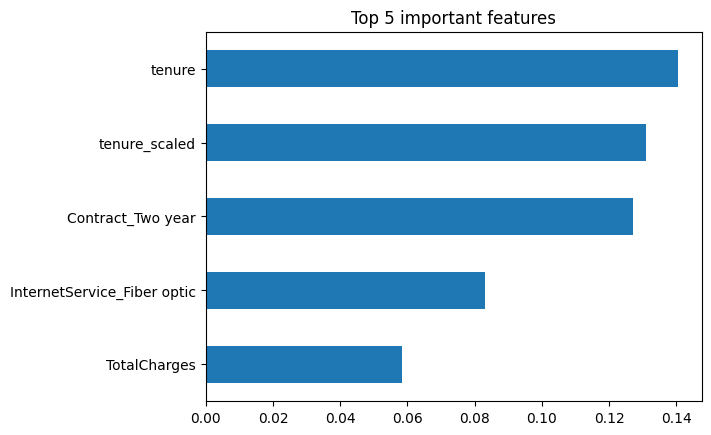

In [34]:
#Feature Importance
imporatnces = final_model.feature_importances_
features_name = x.columns
feat_imp = pd.Series(imporatnces, index=features_name).sort_values(ascending=False)

print("Top 5 important features:\n", feat_imp.head(5))

feat_imp.head(5).plot(kind='barh',title='Top 5 important features')
plt.gca().invert_yaxis()
plt.show()